# Compression strength of concrete
For current and historic concrete classes used in Germany.


```{todo}
Write this section.
```


In [1]:
import math
import numpy as np
import fesslix as flx
flx.load_engine()

0

Random Number Generator: MT19937 - initialized with rand()=666306081;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Select appropriate concrete strength class

```{note}
Please uncomment the string that matches the concrete class of interest. Leave empty if *unknown*.
```

In [2]:
## ==============================
## no prior information available
## ==============================
str_fc = ""    ## in case you do not have prior information about the concrete strength

## unabhängig vom Baujahr »» keine Informationen über die Betonfestigkeitsklasse vorhanden
#str_fc = ""

## =========================
## for concrete before 1916
## =========================
#str_fc = ""

## ================================================================
## Betongüten und -klassen von 1916 bis 1972 (für die DDR bis 1980)
## ================================================================
#str_fc = "1916-1925: W_28=150kg/cm²"
#str_fc = "1916-1925: W_28=180kg/cm²"
#str_fc = "1925-1932: W_b28=100kg/cm²"
#str_fc = "1925-1932: W_b28=130kg/cm²"
#str_fc = "1925-1932: W_b28=180kg/cm²"
#str_fc = "1932-1943: W_b28=120kg/cm²"
#str_fc = "1932-1943: W_b28=160kg/cm²"
#str_fc = "1932-1943: W_b28=210kg/cm²"
#str_fc = "1943-1972: B 120; (DDR) bis 1980"
#str_fc = "1943-1972: B 160; (DDR) bis 1980"
#str_fc = "1943-1972: B 225; (DDR) bis 1980"
#str_fc = "1943-1972: B 300; (DDR) bis 1980"

## ----------------------------------------------------------
## In this category, please additionally uncomment 'str_qual'
## ----------------------------------------------------------
## Bitte bewerten Sie die Qualität der Betonherstellung und Ausführung:

#str_qual = "kleine Baustelle, keine Betonproben, Zumessung nach Volumen, Überwachung durch Polier"
#str_qual = "mittlere Baustelle, 3-10 Betonproben, Zumessung nach Volumen oder Gewicht, Überwachung durch Polier"
#str_qual = "Großbaustelle, 30 und mehr Betonproben, Zumessung nach Gewicht, Überwachung durch Betoningenieur"

## ==============================================
## Betongüten und -klassen zwischen 1972 und 2001
## ==============================================
#str_fc = "1972-1978: Bn 50"
#str_fc = "1972-1978: Bn 100""
#str_fc = "1972-1978: Bn 150"
#str_fc = "1972-1978: Bn 250"
#str_fc = "1972-1978: Bn 350"
#str_fc = "1972-1978: Bn 450"
#str_fc = "1972-1978: Bn 550"
#str_fc = "1978-2001: B 5"
#str_fc = "1978-2001: B 10"
#str_fc = "1978-2001: B 15"
#str_fc = "1978-2001: B 25"
#str_fc = "1978-2001: B 35"
#str_fc = "1978-2001: B 45"
#str_fc = "1978-2001: B 55"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 5"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 7.5""
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 10"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 15"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 20"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 25"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 35"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 45"
#str_fc = "Ostdeutschland (DDR), 1980-1990: Bk 55"

## =========
## nach 2001
## =========
#str_fc = "C12/15"
#str_fc = "C16/20"
#str_fc = "C20/25"
#str_fc = "C25/30"
#str_fc = "C30/37"
str_fc = "C35/45"
#str_fc = "C40/50"
#str_fc = "C45/55"
#str_fc = "C50/60"
#str_fc = "C55/67"
#str_fc = "C60/75"
#str_fc = "C70/85"
#str_fc = "C80/95"
#str_fc = "C90/105"
#str_fc = "LC12/13"
#str_fc = "LC16/18"
#str_fc = "LC20/22"
#str_fc = "LC25/28"
#str_fc = "LC30/33"
#str_fc = "LC35/38"
#str_fc = "LC40/44"
#str_fc = "LC45/50"
#str_fc = "LC50/55"
#str_fc = "LC55/60"
#str_fc = "LC60/66"
#str_fc = "LC70/77"
#str_fc = "LC80/88"

## ==============================================
## Output selection
## ==============================================
print(f"You selected '{str_fc}'.")

You selected 'C35/45'.


## Processing of prior information
Next, we process the prior information ...

In [3]:
kappa_0 = 3.    ## following JCSS
eta_0   = 7.    ## JCSS schlägt 10 vor; mit 7 werden die charakteristischen Werte aus dem EC besser getroffen (konservativer)
q       = 0.05  ## quantile of characteristic value
## 'gamma_0' and 'tau_0' are to be set within the following if-clauses
## ================================
## uniformative prior
## ================================
if str_fc=="":
    gamma_0 = 0.
    kappa_0 = 0.
    eta_0   = 0.
    tau_0   = 0.
    xi_0    = 0.
## ================================
## process today's concrete classes
## ================================
elif str_fc[0]=='C' or str_fc[:2]=='LC':
    ## select f_ck
    is_lightweight = (str_fc[:2]=='LC')
    i = str_fc.find('C') + 1
    j = str_fc.find('/')
    f_ck = float( str_fc[i:j] )
    ## select f_cm
    if is_lightweight and f_ck<20:
        if f_ck < 15.:
            f_cm = f_ck + 5.
        else:
            f_cm = f_ck + 6.
    else:
        f_cm = f_ck + 8.
    rv_tmp = flx.rv({'type':'studentstgen', 'dof':eta_0, 'loc':math.log(f_cm), 'val_1':math.log(f_ck), 'pr_1':q})
    rv_tmp_prop =  rv_tmp.info()
    gamma_0 = rv_tmp_prop['loc']
    tau_0 = rv_tmp_prop['scale']
## ==============================================
## Betongüten und -klassen zwischen 1972 und 2001
## ==============================================
elif ("-1978: " in str_fc) or ("-2001: " in str_fc) or ("-1990: " in str_fc):
    i = str_fc.find(':') + 2
    t_str = str_fc[i:]
    if t_str[1]=='n':
        f_ck_cube = float(t_str[3:])
        f_ck_cube /= 10
        f_ck = f_ck_cube*0.773
        CoV_transf = 0.1
    elif t_str[1]=='k':
        f_ck_cube = float(t_str[3:])
        f_ck = f_ck_cube*0.736
        CoV_transf = 0.08
    else:
        f_ck_cube = float(t_str[2:])
        f_ck = f_ck_cube*0.773
        CoV_transf = 0.1
    f_cm = f_ck + 8.  ## assume that today's standard is valid in this context
    rv_tmp = flx.rv({'type':'studentstgen', 'dof':eta_0, 'loc':math.log(f_cm), 'val_1':math.log(f_ck), 'pr_1':q})
    rv_tmp_prop =  rv_tmp.info()    
    gamma_0 = rv_tmp_prop['loc']
    tau_0 = rv_tmp_prop['scale']
    ## consider uncertainty from transformation
    tau2_add = math.log(CoV_transf**2+1.)
    gamma_0 -= tau2_add/2
    tau_0 += math.sqrt(tau2_add)
## ==============================================
## Betongüten und -klassen zwischen 1972 und 2001
## ==============================================
elif ("(DDR) bis 1980" in str_fc) or (": W_" in str_fc):
    ## select f_cm
    if "(DDR) bis 1980" in str_fc:
        i = str_fc.find(':') + 4
        j = str_fc.find(';')
        f_cm_cube = float(str_fc[i:j])
    else:
        i = str_fc.find('=') + 1
        j = str_fc.find('kg')
        f_cm_cube = float(str_fc[i:j])
    f_cm_cube /= 10
    f_cm = f_cm_cube*0.773
    gamma_0 = math.log(f_cm)
    ## select standard deviation
    if str_qual[:3]=="kle":
        i = 0
    elif str_qual[:3]=="mit":
        i = 1
    elif str_qual[:3]=="Gro":
        i = 2
    else:
        raise NameError(f'ERROR 202503281450')
    if f_cm_cube<20:
        f_c_CoV = [0.35,0.28,0.2][i]
    else:        
        f_c_CoV = [7.,5.5,4.][i]/f_cm_cube
    f_c_sd = f_c_CoV*f_cm
    CoV_transf = 0.1
    f_c_sd = math.sqrt( f_c_sd**2*(CoV_transf**2+1.)+CoV_transf**2*f_cm )
    tau_0 = math.sqrt( math.log( (f_c_sd/f_cm)**2+1. ));
    print(f"yeah {gamma_0}, {tau_0}")
## ==============================================
## Betongüten und -klassen zwischen 1972 und 2001
## ==============================================
else:
    raise NameError(f'ERROR 202503281441') 
    
## evaluate 'xi_0'
if kappa_0>0.:
    xi_0 = tau_0/math.sqrt(1.+1/kappa_0)

... and evaluate the prior distribution:

In [4]:
rv_ln_prior = flx.rv({'type':'logt', 'dof':eta_0, 'loc':gamma_0, 'scale':tau_0})
print(f"{gamma_0 = :.2f}  {kappa_0 = :.1f}  {eta_0 = :.1f}  {xi_0 = :.2f}  {tau_0 = :.2f}")
print(f"f_ck = {rv_ln_prior.icdf(q):.2f}")

gamma_0 = 3.76  kappa_0 = 3.0  eta_0 = 7.0  xi_0 = 0.09  tau_0 = 0.11
f_ck = 35.00


## Measurements
Please specify any measurement values for concrete:

In [5]:
## vector of measurements
meas_obsv = [ 50.1, 41.1, 33.0, 50.2, 54.3, 45.2, 50.6, 52.1, 58.1, 45.4 ]  ## [N/mm²]
h_test    = [ 82.,  83.,  82.,  84.,  83.,  82.,  83.,  83.,  83.,  83.  ]  ## [mm]  length of test specimen
d_test    = 80.  ## [mm] diameter of test specimen

## another set of measurements
#meas_obsv = [ 53.0, 57.6, 64.8, 60.9, 62.6, 55.4, 56.3, 53.7, 52.7, 57.0 ]  ## [N/mm²]
#h_test    = [ 81.,  82.,  81.,  81.,  81.,  80.,  81.,  82.,  81.,  81.  ]  ## [mm]  length of test specimen
#d_test    = 80.  ## [mm] diameter of test specimen

## transformation to 'reference cylinder'
clf  = (np.array(h_test) / (2*d_test))**0.29
f_c_obsv  = meas_obsv * clf
print( f_c_obsv )
# f_c_obsv = []  ## leave empty, if no measurements were taken

[41.27137595 33.97658094 27.18473865 41.6437581  44.88876752 37.23485415
 41.83004855 43.07006975 48.03015456 37.53130838]


Evaluate summary statistics:

In [6]:
ln_obsv    = np.log(f_c_obsv)
m_ln_obsv  = np.mean(ln_obsv)
s2_ln_obsv = np.var(ln_obsv,ddof=0)
n_obsv     = len(ln_obsv)

print(f"  Anzahl der Messwerte:          {n_obsv}")
print(f"  Stichprobenmittel:             {np.mean(f_c_obsv):.2f} N/mm²")
print(f"  Stichprobenstandardabweichung: {np.std(f_c_obsv,ddof=0):.2f} N/mm²")
print(f"")
print(f"log-transformierte Messwerte:")
print(f"  Stichprobenmittel:             {m_ln_obsv:.2f}")
print(f"  Stichprobenstandardabweichung: {math.sqrt(s2_ln_obsv):.2f}")
print(f"  Stichprobenstandardabweichung: {s2_ln_obsv:.3f}")

  Anzahl der Messwerte:          10
  Stichprobenmittel:             39.67 N/mm²
  Stichprobenstandardabweichung: 5.64 N/mm²

log-transformierte Messwerte:
  Stichprobenmittel:             3.67
  Stichprobenstandardabweichung: 0.15
  Stichprobenstandardabweichung: 0.024


## Posterior distribution: Taking information from both prior and measurements into account

In [7]:
gamma_n = (kappa_0*gamma_0+n_obsv*m_ln_obsv)/(kappa_0+n_obsv)
kappa_n = kappa_0 + n_obsv
eta_n   = eta_0 + n_obsv
xi2_n   = eta_0/eta_n*xi_0**2+n_obsv/eta_n*(s2_ln_obsv+(kappa_0*(m_ln_obsv-gamma_0)**2)/kappa_n)
xi_n    = math.sqrt(xi2_n)
tau_n   = xi_n*math.sqrt(1.+1/kappa_n);

rv_ln_post = flx.rv({'type':'logt', 'dof':eta_n, 'loc':gamma_n, 'scale':tau_n})
print(f"{gamma_n = :.2f}  {kappa_n = :.1f}  {eta_n = :.1f}  {xi_n = :.2f}  {tau_n = :.2f}")
print(f"f_ck = {rv_ln_post.icdf(q):.2f}")

gamma_n = 3.69  kappa_n = 13.0  eta_n = 17.0  xi_n = 0.14  tau_n = 0.14
f_ck = 31.28


## Posterior in case of uninformative prior

In case of an uninformative prior, the parameters of the posterior distribution and the associated characteristic values are:

In [8]:
gamma_n_ui = (n_obsv*m_ln_obsv)/n_obsv
kappa_n_ui = n_obsv
eta_n_ui   = n_obsv
xi2_n_ui   = s2_ln_obsv
xi_n_ui    = math.sqrt(xi2_n_ui)
tau_n_ui   = xi_n_ui*math.sqrt(1.+1/kappa_n_ui);

rv_tmp = flx.rv({'type':'studentstgen', 'dof':eta_n_ui, 'loc':gamma_n_ui, 'scale':tau_n_ui})
rv_ln_post_ui = flx.rv({'type':'logt', 'dof':eta_n_ui, 'loc':gamma_n_ui, 'scale':tau_n_ui})
print( rv_ln_post_ui.get_value(), rv_tmp.get_value() )
print( rv_ln_post_ui.y2x(0.), rv_tmp.y2x(0.) )
print(f"{gamma_n_ui = :.2f}  {kappa_n_ui = :.1f}  {eta_n_ui = :.1f}  {xi_n_ui = :.2f}  {tau_n_ui = :.2f}")
print(f"f_ck = {rv_ln_post_ui.icdf(q):.2f}")

39.22258989185964 3.6692528535665603
39.22258989185964 3.6692528535665603
gamma_n_ui = 3.67  kappa_n_ui = 10.0  eta_n_ui = 10.0  xi_n_ui = 0.15  tau_n_ui = 0.16
f_ck = 29.25


## Generate plot of distributions

In [9]:
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget

Evaluate shape of likelihood from prior and posterior:

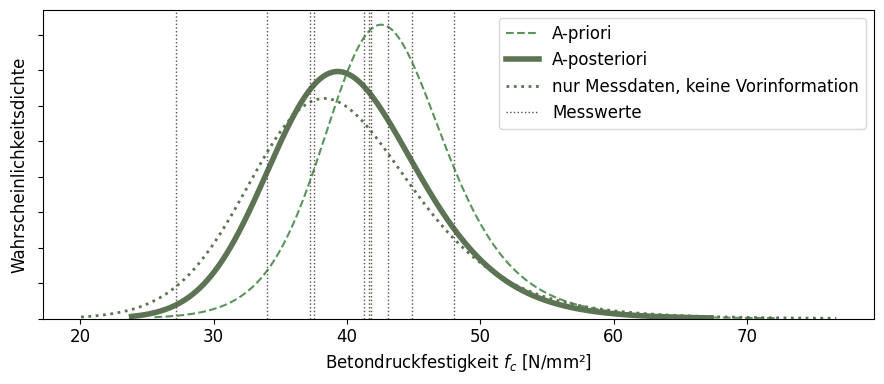

In [11]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(9, 4))

flx_plot.draw_pdf(ax, rv_ln_prior, config_dict={'label':"A-priori"}, param_dict={ 'c':flx_plot.color_era_1, 'ls':'--' })
flx_plot.draw_pdf(ax, rv_ln_post, config_dict={'label':"A-posteriori"}, param_dict={ 'c':flx_plot.color_era_2, 'lw':4 })

flx_plot.draw_pdf(ax, rv_ln_post_ui, config_dict={'label':"nur Messdaten, keine Vorinformation"}, param_dict={ 'c':flx_plot.color_era_2, 'lw':2, 'ls':':' })

for i, f_c in enumerate(f_c_obsv):
    if i==0:
        lbl = "Messwerte"
    else:
        lbl = None
    plt.axvline(x=f_c, c=flx_plot.color_era_3, lw=1, ls='dotted', label=lbl)

ax.set_ylim([0., None])
plt.xlabel("Betondruckfestigkeit $f_c$ [N/mm²]")
plt.ylabel("Wahrscheinlichkeitsdichte")
#ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])
plt.legend()
plt.tight_layout()
#fig.savefig(f"appl_concrete_fc_figure.pdf")
#fig.savefig(f"appl_concrete_fc_figure.png")
#fig.savefig(f"appl_concrete_fc_figure.eps")
#plt.grid()